# HW CODING 
## Problem 2 

Prayag Nikul Purani
SJSU ID- 017416737

In [1]:
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

# A

## Loading the data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Filtering Based on last two digits 3 , 7

In [3]:
y_train_filter = np.isin(y_train,[3,7])
y_test_filter = np.isin(y_test,[3,7])

In [4]:
y_train1 = y_train[y_train_filter]
y_test1 = y_test[y_test_filter]

In [5]:
x_train1 = x_train[y_train_filter]
x_test1 = x_test[y_test_filter]

In [6]:
print("Shape of X_train",x_train1.shape)
print("Shape of X_test",x_test1.shape)
print("Shape of y_train",y_train1.shape)
print("Shape of y_test",y_test1.shape)

Shape of X_train (12396, 28, 28)
Shape of X_test (2038, 28, 28)
Shape of y_train (12396,)
Shape of y_test (2038,)


## Preprocessing the Data

In [7]:
# Scale images to the [0, 1] range
x_train1 = x_train1.astype("float32") / 255
x_test1 = x_test1.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train1 = np.expand_dims(x_train1, -1)
x_test1 = np.expand_dims(x_test1, -1)

In [8]:
y_train1 = np.where(y_train1==7,1,0)
y_test1 = np.where(y_test1==7,1,0)

# Building Model

In [9]:
input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [10]:
model_summary = model.summary()
print(model_summary)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,601 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,417 (79.75 KB)

 Trainable params: 20,417 (79.75 KB)

 Non-trainable params: 0 (0.00 B)

None


## Training the Model

In [11]:
batch_size = 32
epochs = 20

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(x_train1, y_train1, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9357 - loss: 0.1909 - val_accuracy: 0.9984 - val_loss: 0.0109
Epoch 2/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9900 - loss: 0.0323 - val_accuracy: 0.9984 - val_loss: 0.0075
Epoch 3/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9925 - loss: 0.0227 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 4/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9938 - loss: 0.0181 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 5/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9946 - loss: 0.0153 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9963 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9966 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 9.8100e-04
Epoch 8/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9963 - loss: 0.0127 - val_

## Evaluarion on test set

In [12]:
eval_test = model.evaluate(x_test1, y_test1)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9983 - loss: 0.0046


In [13]:
# printing the loss and accuracy value on test data
print('Test loss:', eval_test[0])
print('Test accuracy:', eval_test[1])

Test loss: 0.002834535902366042
Test accuracy: 0.999018669128418


In [14]:
import matplotlib.pyplot as plt

In [15]:
history_dict = history.history

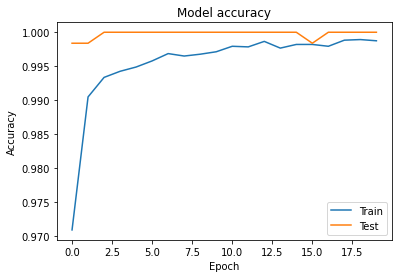

In [16]:
# Plotting train vs validation data accuracy per epoch
plt.figure()
# Getting the model accuracy from keras callback history function
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

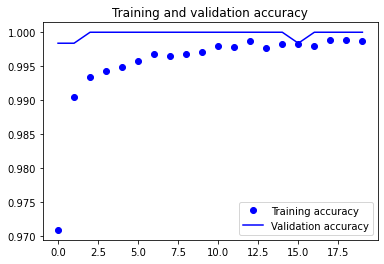

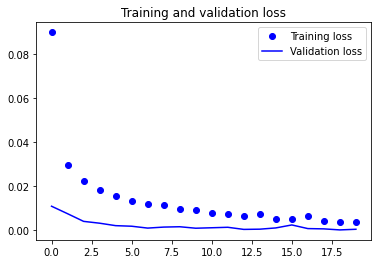

In [17]:
# print both accuracy and loss per ephoch for both training and validation set
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Using early stopping criteria

In [18]:
# Import early stopping from keras callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [19]:
history2 = model.fit(x_train1, y_train1, batch_size= 512, epochs= 20, validation_split= 0.20,callbacks = [early_stopping])

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 8.0225e-04
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.9996 - loss: 0.0023 - val_accuracy: 0.9996 - val_loss: 7.8664e-04
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.9990 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 7.4649e-04
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9996 - val_loss: 7.2946e-04
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 7.1612e-04
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 6.9147e-04
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 7.1367e-04
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.9994 - los

In [20]:
# evaluating the performance of model on test data
test_loss, test_acc = model.evaluate(x_test1, y_test1)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9983 - loss: 0.0046
Test loss: 0.002855987986549735
Test accuracy: 0.999018669128418


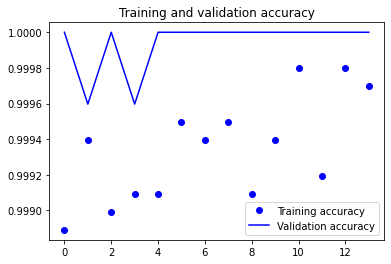

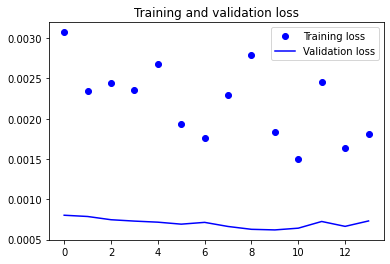

In [21]:
# print both accuracy and loss per epoch for both training and validation set when Early Stopping Method is used.
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
# creating the function to visualise  images
def show_image(image, cmap_type= 'gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

actual value is 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
predicted value is 1


C:\Users\Prayag Purani\AppData\Local\Temp\ipykernel_18980\3053621210.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("predicted value is", int(predict_val>0.9))


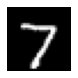

-------------


actual value is 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted value is 1


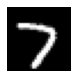

-------------


actual value is 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted value is 0


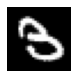

-------------


actual value is 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
predicted value is 1


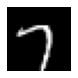

-------------


actual value is 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted value is 0


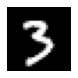

-------------


actual value is 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
predicted value is 0


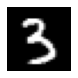

-------------


actual value is 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted value is 1


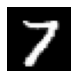

-------------


actual value is 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
predicted value is 1


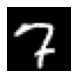

-------------


actual value is 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted value is 1


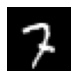

-------------




In [23]:
for i in range(9): 
    plt.subplot(3,3,i+1)
    print("actual value is", y_test1[i])
    predict_val = model.predict(x_test1[i].reshape(1,28,28,1))
    print("predicted value is", int(predict_val>0.9)) 
    show_image(x_test1[i].reshape(28,28)) 
    # show_image function was created in the beginning to print images using plt.imshow()
    print("-------------")
    print("\n")

## Confusion Matrix

In [24]:
# importing the module
from sklearn.metrics import confusion_matrix

#printing the confusion matrix
prediction = model.predict(x_test1)
prediction = np.where(prediction>0.9,1,0)
cm = confusion_matrix(y_test1, prediction)
print(cm)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[1010    0]
 [   6 1022]]


In [25]:
import seaborn as sns

<Axes: >

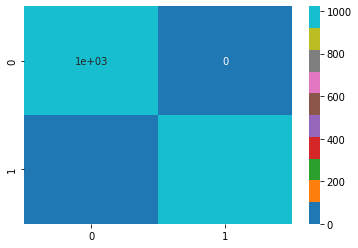

In [26]:
# printing the confusion matrix in heatmap to visualise results
sns.heatmap(cm,annot=True, cmap= 'tab10')

# B

In [27]:
x_train1.shape, x_train1.shape 

((12396, 28, 28, 1), (12396, 28, 28, 1))

In [28]:
# creating the function for the model 
def build_model(custom_kernel_initiaizer= "glorot_uniform",custom_bias_initiaizer= "zeros"):
    # Create a new sequential model with the same  hyper-parameters used above.
    model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3),kernel_initializer=custom_kernel_initiaizer,bias_initializer=custom_bias_initiaizer, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3),kernel_initializer=custom_kernel_initiaizer,bias_initializer=custom_bias_initiaizer, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)
    return model

In [29]:
list_of_kernel = ["glorot_uniform","random_uniform","random_normal"]
list_of_bias = ["glorot_uniform","random_uniform","random_normal"]
list_model=[]
list_history=[]
for i in range(3):
    model = build_model(list_of_kernel[i],list_of_bias[i])
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    history=model.fit(x_train1, y_train1, batch_size=512, epochs=15, validation_split=0.1)
    list_model.append(model)
    list_history.append(history)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.6886 - loss: 0.6267 - val_accuracy: 0.9863 - val_loss: 0.3062
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.9619 - loss: 0.2416 - val_accuracy: 0.9887 - val_loss: 0.0502
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.9727 - loss: 0.0813 - val_accuracy: 0.9919 - val_loss: 0.0301
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9776 - loss: 0.0674 - val_accuracy: 0.9944 - val_loss: 0.0244
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9843 - loss: 0.0510 - val_accuracy: 0.9952 - val_loss: 0.0224
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9835 - loss: 0.0494 - val_accuracy: 0.9968 - val_loss: 0.0169
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.9870 - loss: 0.0438 - val_accuracy: 0.9968 - val_loss: 0.0155
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.9876 - loss: 0.0395 - val_accuracy: 0.

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
[[1008    2]
 [  26 1002]]


<Axes: >

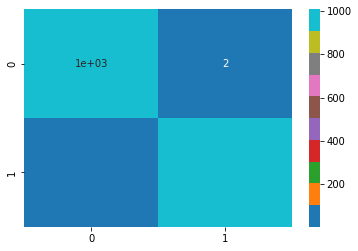

In [30]:
prediction = list_model[0].predict(x_test1)
prediction = np.where(prediction>0.9,1,0)
cm = confusion_matrix(y_test1, prediction)
print(cm)
# printing the confusion matrix in heatmap to visualise results for model with glorot_uniform kernel and glorot_uniform bias
sns.heatmap(cm,annot=True, cmap= 'tab10')

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[1009    1]
 [  27 1001]]


<Axes: >

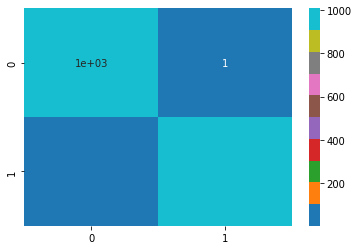

In [31]:
prediction = list_model[1].predict(x_test1)
prediction = np.where(prediction>0.9,1,0)
cm = confusion_matrix(y_test1, prediction)
print(cm)
# printing the confusion matrix in heatmap to visualise results for model with random_uniform kernel and random_uniform bias
sns.heatmap(cm,annot=True, cmap= 'tab10')

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[1009    1]
 [  35  993]]


<Axes: >

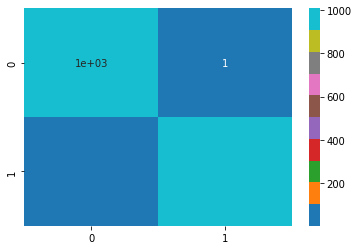

In [32]:
prediction = list_model[2].predict(x_test1)
prediction = np.where(prediction>0.9,1,0)
cm = confusion_matrix(y_test1, prediction)
print(cm)
# printing the confusion matrix in heatmap to visualise results for model with random_normal kernel and random_normal bias
sns.heatmap(cm,annot=True, cmap= 'tab10')

Learing Curve for Glorot Uniform Kernel and Glorot Uniform Bias


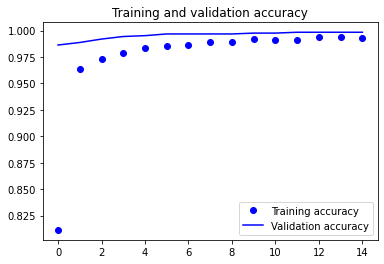

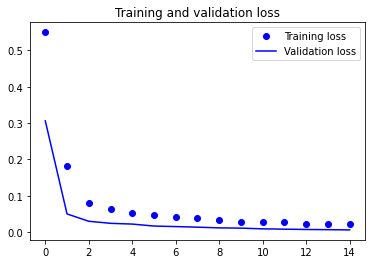

In [33]:
def plot_learning_curves(item):
    accuracy = item.history['accuracy']
    val_accuracy = item.history['val_accuracy']
    loss = item.history['loss']
    val_loss = item.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
print("Learing Curve for Glorot Uniform Kernel and Glorot Uniform Bias")
plot_learning_curves(list_history[0])

Learing Curve for Random Uniform Kernel and Random Uniform Bias


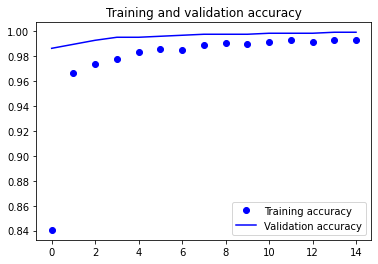

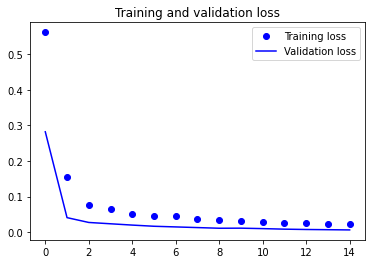

In [34]:
print("Learing Curve for Random Uniform Kernel and Random Uniform Bias")

plot_learning_curves(list_history[1])

Learing Curve for Random Normal Kernel and Random Normal Bias


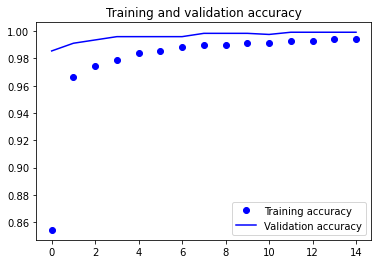

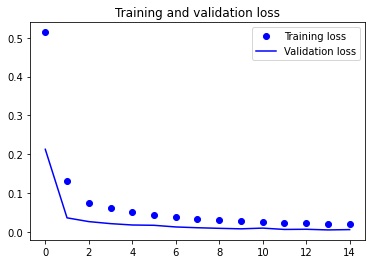

In [35]:
print("Learing Curve for Random Normal Kernel and Random Normal Bias")
plot_learning_curves(list_history[2])

We can observe that all the three weight initializers are performing similar. But the first kernel initializer glorat unifrom performs better than the other two.

In [36]:
# Evaluate the performance of models on test data
test_loss_g, test_acc_g = list_model[0].evaluate(x_test1, y_test1)
test_loss_ru, test_acc_ru =list_model[1].evaluate(x_test1, y_test1)
test_loss_rn, test_acc_rn = list_model[2].evaluate(x_test1, y_test1)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9914 - loss: 0.0217
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9892 - loss: 0.0231
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9911 - loss: 0.0254


In [37]:
import pandas as pd
df = pd.DataFrame({'accuracy': [test_acc_g,test_acc_ru,test_acc_rn],'weights': ['glorot uniform','random uniform','random normal']})

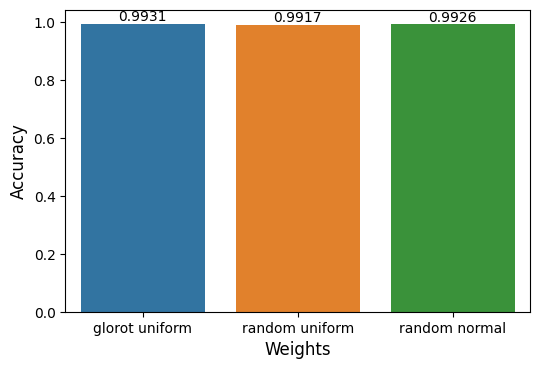

In [38]:
plt.figure(figsize=(6,4), dpi=100)
ax = sns.barplot(data= df, x='weights', y='accuracy')

# Add text on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height()+0.01, f'{p.get_height():.4f}', ha="center")
    
# Show plot
plt.ylabel('Accuracy', size= 12)
plt.xlabel('Weights', size= 12)
plt.show()

We can observe clearly the results are quite similar and there is small difference between accuracy with Random Normal perfoming the best and Glorat Unifrom performing the worst.

# Table for Hyperparameters

| Hyperparameter | Values |
|-----------------------|-----------|
| Activation Function | Relu, SoftMAx|
| Weight Initializer | he_normal, glorot_uniform, random_normal |
| Number of hidden layers | 2 |
| Number of neurons in hidden layers | 32+64+64 = 160 |
| Loss Function | categorical_crossentropy |
| Optimizer | adam |
| Number of Epochs | 20 |
| Learning Rate  | 0.001  |
| Batch Size     | 32     |
| Evaluation Metrics | Accuracy |

# Problem 3

In [39]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [40]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output units for 10 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Prayag Purani\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [41]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [42]:
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9086 - loss: 0.2888 - val_accuracy: 0.9818 - val_loss: 0.0679
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9858 - loss: 0.0455 - val_accuracy: 0.9868 - val_loss: 0.0518
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9899 - loss: 0.0298 - val_accuracy: 0.9890 - val_loss: 0.0425
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9898 - val_loss: 0.0405
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9957 - loss: 0.0126 - val_accuracy: 0.9887 - val_loss: 0.0573
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9908 - val_loss: 0.0421
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9977 - loss: 0.0070 - val_accuracy: 0.9887 - val_loss: 0.0566


In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9854 - loss: 0.0542
Test accuracy: 0.9884999990463257


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


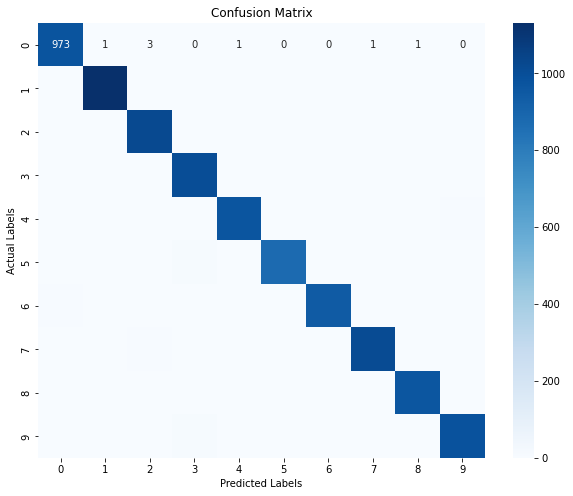

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix

# Predict the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [45]:
conf_matrix

array([[ 973,    1,    3,    0,    1,    0,    0,    1,    1,    0],
       [   0, 1131,    0,    1,    0,    0,    0,    2,    1,    0],
       [   0,    1, 1023,    0,    3,    0,    0,    3,    2,    0],
       [   0,    0,    2, 1004,    0,    2,    0,    0,    2,    0],
       [   0,    1,    0,    0,  970,    0,    4,    0,    1,    6],
       [   0,    1,    0,   11,    0,  876,    4,    0,    0,    0],
       [   5,    2,    1,    0,    3,    2,  943,    0,    2,    0],
       [   0,    3,    8,    1,    0,    0,    0, 1015,    1,    0],
       [   2,    0,    2,    1,    0,    0,    1,    1,  965,    2],
       [   1,    1,    0,   12,    3,    2,    0,    1,    4,  985]],
      dtype=int64)

In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         495,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,545,440 (5.90 MB)

 Trainable params: 515,146 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,030,294 (3.93 MB)

# Table for hyperparameters

| Hyperparameter | Values |
|----------------|--------|
| Activation Function | Relu, SoftMAx|
| Weight Initializer | he_normal |
| Number of hidden layers | 2 |
| Number of neurons in hidden layers | 32+64+64 = 160 |
| Loss Function | categorical_crossentropy |
| Optimizer | adam |
| Number of Epochs | 20 |
| Learning Rate  | 0.001  |
| Batch Size     | 32     |
| Evaluation Metrics | Accuracy |

# Problem 4 

In [47]:
import numpy as np
import time
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [48]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [49]:
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  # 10 classes
    ])
    return model

In [50]:
# Define function to calculate inference time
def calculate_inference_time(model, test_images, test_labels):
    start_time = time.time()
    model.evaluate(test_images, test_labels, verbose=0)
    inference_time = time.time() - start_time
    return inference_time


In [51]:
# Batch Gradient Descent
def train_with_batch_gd():
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(train_images, train_labels, epochs=10, batch_size=len(train_images), validation_split=0.2, verbose=0)
    training_time = time.time() - start_time
    
    _, accuracy = model.evaluate(test_images, test_labels, verbose=0)
    model_size = model.count_params()
    inference_time = calculate_inference_time(model, test_images, test_labels)
    
    return accuracy, model_size, training_time, inference_time

In [52]:
# Stochastic Gradient Descent
def train_with_sgd():
    model = create_model()
    sgd = SGD(learning_rate=0.01)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(train_images, train_labels, epochs=10, batch_size=1, validation_split=0.2, verbose=0)
    training_time = time.time() - start_time
    
    _, accuracy = model.evaluate(test_images, test_labels, verbose=0)
    model_size = model.count_params()
    inference_time = calculate_inference_time(model, test_images, test_labels)
    
    return accuracy, model_size, training_time, inference_time

In [53]:
# Mini-batch Gradient Descent
def train_with_minibatch_gd(batch_size):
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(train_images, train_labels, epochs=10, batch_size=batch_size, validation_split=0.2, verbose=0)
    training_time = time.time() - start_time
    
    _, accuracy = model.evaluate(test_images, test_labels, verbose=0)
    model_size = model.count_params()
    inference_time = calculate_inference_time(model, test_images, test_labels)
    
    return accuracy, model_size, training_time, inference_time

In [54]:
# Run all training methods and collect results
results = []
batch_gd_result = train_with_batch_gd()
results.append(['Batch Gradient Descent', *batch_gd_result])

C:\Users\Prayag Purani\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
sgd_result = train_with_sgd()
results.append(['Stochastic Gradient Descent', *sgd_result])

In [56]:
minibatch_gd_result = train_with_minibatch_gd(32)  # Using batch size of 32
results.append(['Mini-batch Gradient Descent (32)', *minibatch_gd_result])

In [57]:
# Display the comparative table
import pandas as pd
df = pd.DataFrame(results, columns=['Method', 'Accuracy', 'Model Size', 'Training Time (s)', 'Inference Time (s)'])
print(df)

                             Method  Accuracy  Model Size  Training Time (s)  \
0            Batch Gradient Descent    0.7198      109386           5.903393   
1       Stochastic Gradient Descent    0.9736      109386        1012.189430   
2  Mini-batch Gradient Descent (32)    0.9750      109386          48.279056   

   Inference Time (s)  
0            0.659376  
1            0.640600  
2            0.640605  


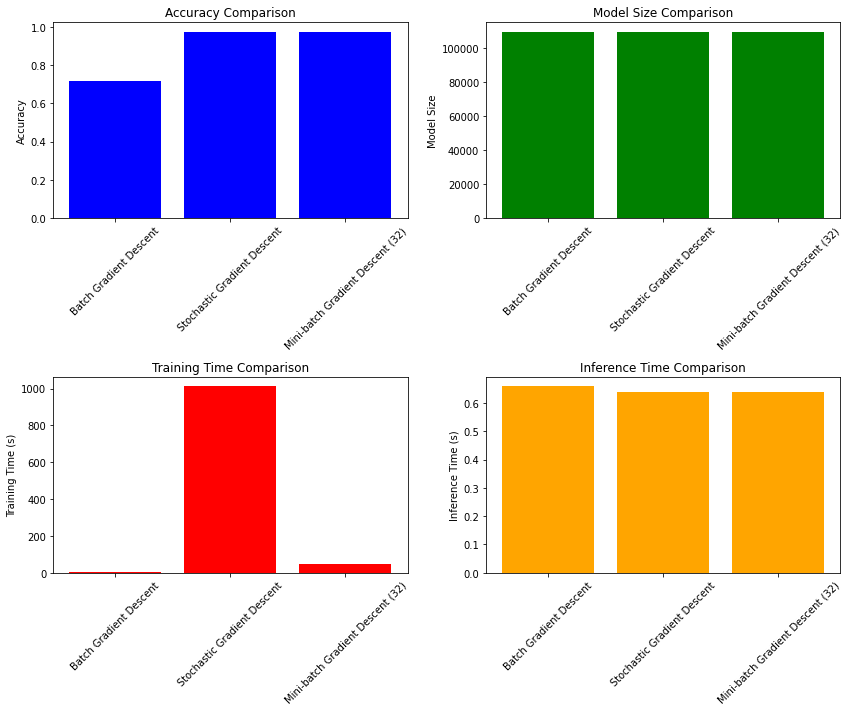

In [58]:
# Modify the plot function to rotate x-labels by 45 degrees

def plot_comparative_results_with_rotation(df):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Accuracy
    axs[0, 0].bar(df['Method'], df['Accuracy'], color='blue')
    axs[0, 0].set_title('Accuracy Comparison')
    axs[0, 0].set_ylabel('Accuracy')
    axs[0, 0].tick_params(axis='x', rotation=45)

    # Model Size
    axs[0, 1].bar(df['Method'], df['Model Size'], color='green')
    axs[0, 1].set_title('Model Size Comparison')
    axs[0, 1].set_ylabel('Model Size')
    axs[0, 1].tick_params(axis='x', rotation=45)

    # Training Time
    axs[1, 0].bar(df['Method'], df['Training Time (s)'], color='red')
    axs[1, 0].set_title('Training Time Comparison')
    axs[1, 0].set_ylabel('Training Time (s)')
    axs[1, 0].tick_params(axis='x', rotation=45)

    # Inference Time
    axs[1, 1].bar(df['Method'], df['Inference Time (s)'], color='orange')
    axs[1, 1].set_title('Inference Time Comparison')
    axs[1, 1].set_ylabel('Inference Time (s)')
    axs[1, 1].tick_params(axis='x', rotation=45)

    # Improve spacing
    plt.tight_layout()
    plt.show()

# Call the modified plotting function
plot_comparative_results_with_rotation(df)